In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [9]:
# возьмем датасет с данными отдела кадров
df_hr = pd.read_csv('data/HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Пояснения к колонкам:
* satisfaction_level - уровень удовлетворенности работой
* last_evaluation - уровень последней оценки работы
* number_project -количество проектов
* average_montly_hours - среднее количество часов в месяц работы
* time_spend_company - шкала от 2 до 10, отражающее время работы в компании
* Work_accident - наличие инцидента на рабочем месте
* left - ушел ли работник или нет
* promotion_last_5years - факт повышения в течение 5 лет
* sales - департамент работника
* salary - уровень зарплаты

Попробуем найти корреляцию между численными переменными

Для этого используем seaborn.heatmap - она наглядно отражает корреляцию переменных

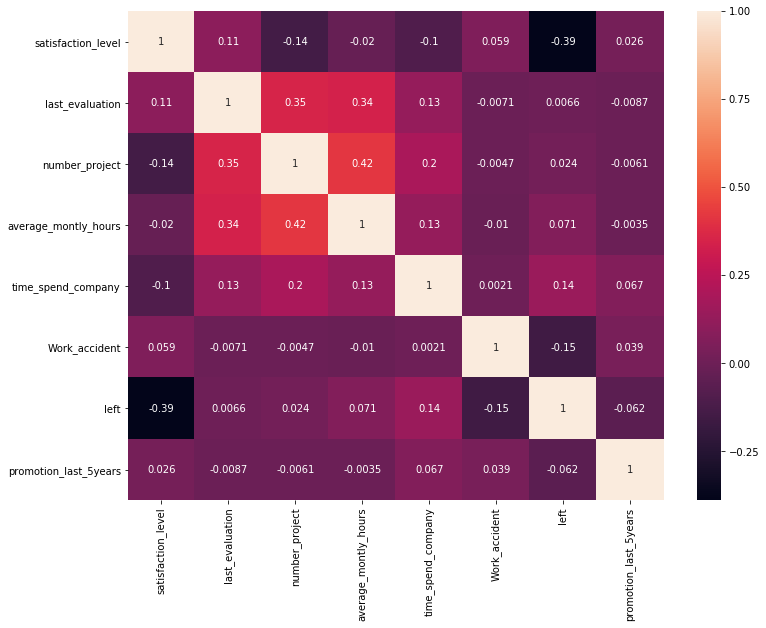

In [10]:
corr_matrix = df_hr.corr()
sns.heatmap(corr_matrix, annot=True);

Построим столбчатые диаграмы для категориальной переменной sales (департамент работника) и left(ушел ли работник)

Для этого используем seaborn.countplot - она наглядно отражает корреляцию переменных

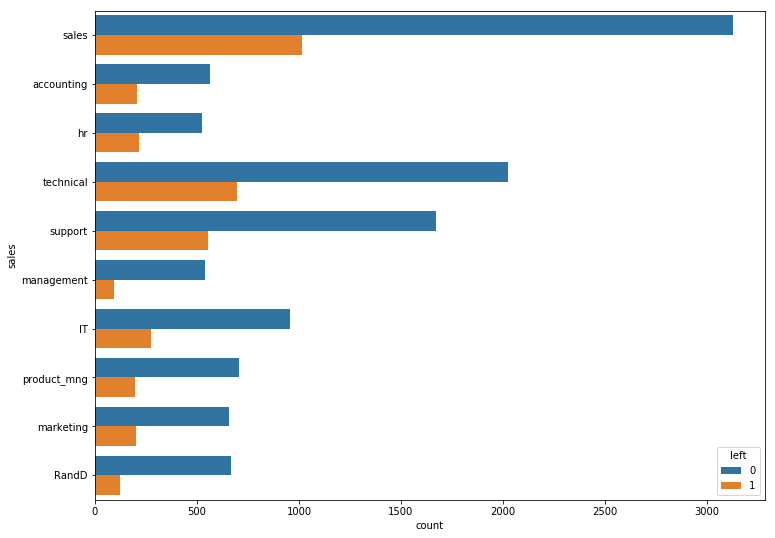

In [11]:
# посмотрим зависимость увольнения из компании от департамента
sns.countplot(y='sales', hue='left', data=df_hr);

Чтобы понять соотношение людей по зарплате, построим круговую диаграмму распределения зарплаты

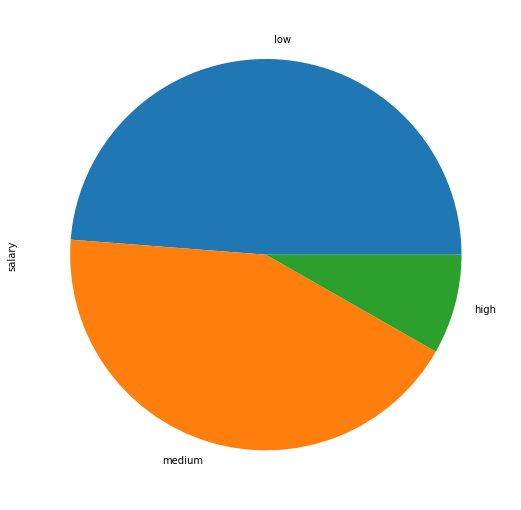

In [12]:
df_hr['salary'].value_counts().plot(kind='pie');

Отобразим с использованием boxplot зависимости ушедших сотрудников от числовых параметров параметров

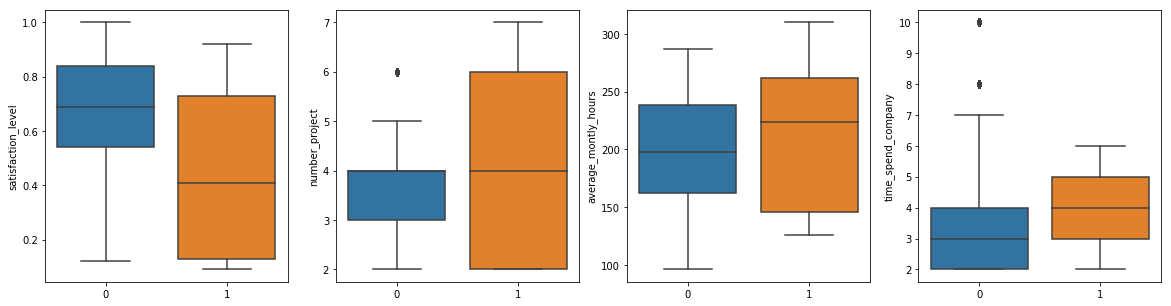

In [13]:
numerical = ['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for idx, feat in enumerate(numerical):
    ax = axes[idx % 4]
    sns.boxplot(x='left', y=feat, data=df_hr, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

In [14]:
# возьмем другой датасет - рост и вес
df_height = pd.read_csv('data/weights_heights.csv')
df_height.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [15]:
# переведем фунты и дюймы в кг и см
df_height['Height'] = df_height['Height'] * 2.54
df_height['Weight'] = df_height['Weight'] * 0.453592
df_height.describe()

,Index,Height,Weight
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,172.702509,57.642209
std,7217.022701,4.830264,5.289290
min,1.000000,153.107034,35.386871
25%,6250.750000,169.429170,54.117461
50%,12500.500000,172.709078,57.677738
75%,18750.250000,175.953312,61.186318
max,25000.000000,190.888112,77.529759


С помощью plt.scatter отразим зависимость численных параметров друг от друга

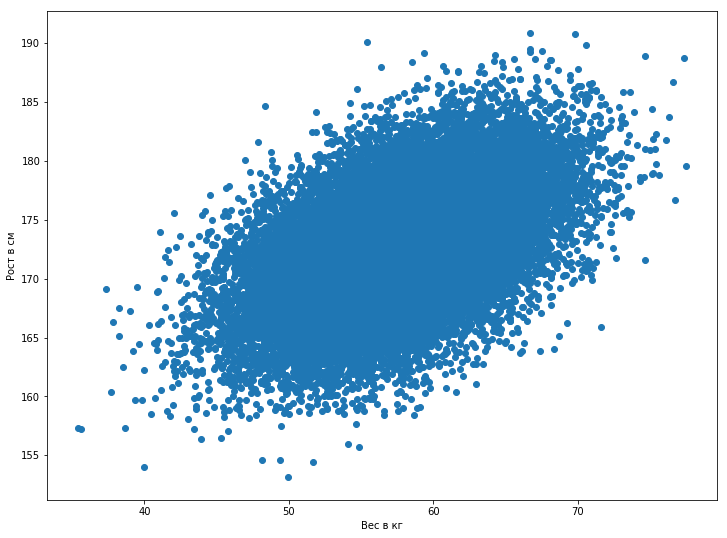

In [16]:
plt.scatter(df_height['Weight'], df_height['Height']); 
plt.xlabel('Вес в кг');
plt.ylabel('Рост в см');

Отразим распределение веса

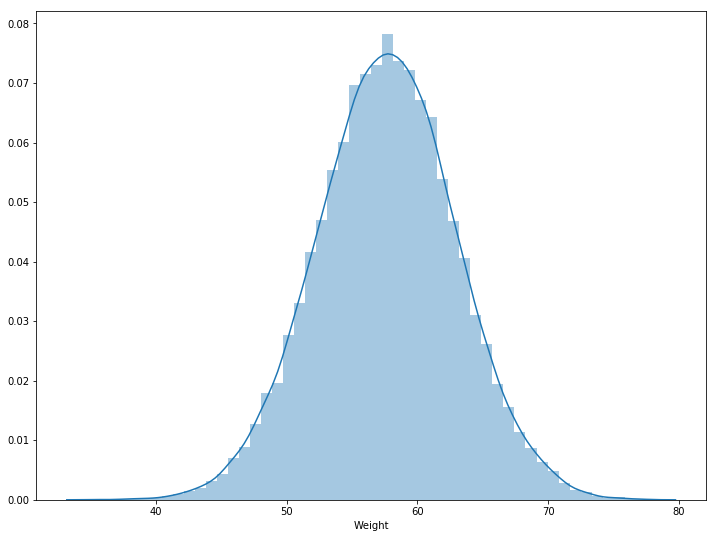

In [17]:
sns.distplot(df_height.Weight);

Отразим распределение роста

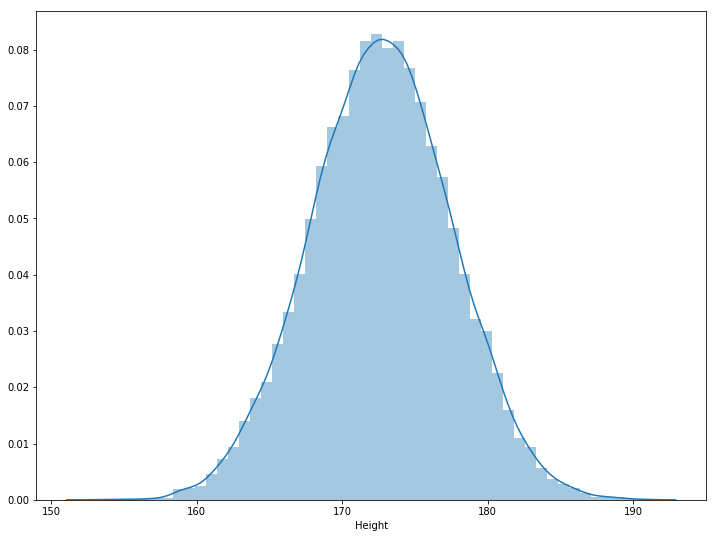

In [18]:
sns.distplot(df_height.Height);